In [1]:
from matplotlib import pyplot as plt

import numpy as np
import scipy
import librosa
from librosa import display

from synchronization import synchronize

In [2]:
# file_1, file_2 = '0_3_0_2020-06-21T17:38:16.424157.wav', '0_2_0_2020-06-21T17:38:16.424138.wav'
file_1, file_2 = '0_3_0_2020-06-08T09:00:05.750593.wav', '0_1_0_2020-06-08T09:00:05.750350.wav'

In [3]:
samples_1, samples_2, sr, delay = synchronize(file_1, file_2)

In [4]:
class FeatureExtractor:
    def __init__(self, audio, *, window_length, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = window_length
        self.window_length = window_length
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)

    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True)

    def get_mel_spectrogram(self):
        return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
                                              n_fft=self.ffT_length, hop_length=self.overlap, center=True)

    def get_audio_from_mel_spectrogram(self, M):
        return librosa.feature.inverse.mel_to_audio(M, sr=self.sample_rate, n_fft=self.ffT_length,
                                                    hop_length=self.overlap,
                                                    win_length=self.window_length, window=self.window,
                                                    center=True, pad_mode='reflect', power=2.0, n_iter=1, length=None)

In [5]:
extractor_1 = FeatureExtractor(samples_1, window_length=1024, overlap=128, sample_rate=sr)

In [6]:
extractor_2 = FeatureExtractor(samples_2, window_length=1024, overlap=128, sample_rate=sr)

# STFT SPEC

In [ ]:
stft_samples_1 = extractor_1.get_stft_spectrogram()
stft_samples_2 = extractor_2.get_stft_spectrogram()
stft_samples_1_dB = librosa.amplitude_to_db(np.abs(stft_samples_1), ref=np.max)
stft_samples_2_dB = librosa.amplitude_to_db(np.abs(stft_samples_2), ref=np.max)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_1_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_1.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_2_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_2.png')
plt.show()

In [ ]:
stft_samples_1_dB_substracted = stft_samples_1_dB.copy()
stft_samples_1_dB_mask = stft_samples_1_dB - stft_samples_2_dB
stft_samples_1_dB_mask[stft_samples_1_dB_mask > 0] = +1
# stft_samples_1_dB_mask[stft_samples_1_dB_mask < 0] = 0
stft_samples_1_dB_substracted[stft_samples_1_dB_mask < 0] = -80

# for i in range(stft_samples_1_dB.shape[0]):
#     stft_samples_1_dB_substracted[i][np.abs(stft_samples_1_dB[i] - stft_samples_2_dB[i]) < 5] = -80.

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_1_dB_substracted, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Stft spectrogram')
plt.tight_layout()
plt.savefig('stft spectrogram file_substracted.png')
plt.show()

In [ ]:
stft_samples_1_substracted = librosa.db_to_amplitude(stft_samples_1_dB, ref=200)
samples_substracted = extractor_1.get_audio_from_stft_spectrogram(stft_samples_1_substracted)
# preempph = librosa.effects.preemphasis(samples_substracted)
# librosa.output.write_wav('substracted1_2_preemph.wav', preempph, sr=sr)
librosa.output.write_wav('substracted1_2_1.wav', samples_substracted, sr=sr)
# mel_samples_substracted_dB = librosa.power_to_db(mel_samples_substracted, ref=np.max)

In [ ]:
stft_samples_1_db_result = librosa.amplitude_to_db(np.abs(stft_samples_1_substracted), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_1_db_result, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Stft spectrogram')
plt.tight_layout()
plt.savefig('stft spectrogram file_substracted.png')
plt.show()

# MEL SPEC

In [7]:
mel_samples_1 = extractor_1.get_mel_spectrogram()
mel_samples_2 = extractor_2.get_mel_spectrogram()
mel_samples_1_dB = librosa.power_to_db(mel_samples_1, ref=np.max)
mel_samples_2_dB = librosa.power_to_db(mel_samples_2, ref=np.max)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_1_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_1.png')
plt.show()

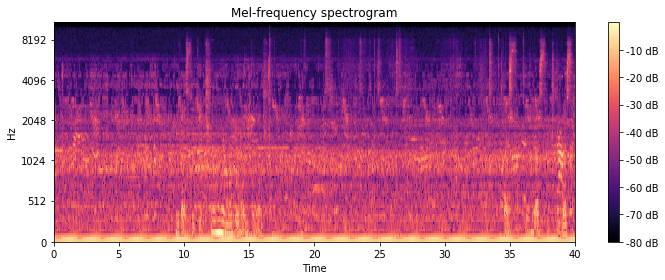

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_2_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_2.png')
plt.show()

In [ ]:
# mel_samples_substracted = mel_samples_1 - mel_samples_2

In [28]:
# mel_samples_substracted_dB = mel_samples_1_dB.copy()
# mel_samples_substracted_dB[np.abs(mel_samples_1_dB - mel_samples_2_dB) < 1] = -80
# mel_samples_substracted = librosa.db_to_power(mel_samples_substracted_dB, ref=200)

In [8]:
mel_samples_substracted = mel_samples_1.copy()
mel_samples_substracted[np.abs(mel_samples_1 - mel_samples_2) < 0.004] = 0

In [ ]:
samples_substracted = extractor_1.get_audio_from_mel_spectrogram(mel_samples_substracted)
# preempph = librosa.effects.preemphasis(samples_substracted)
# librosa.output.write_wav('substracted1_2_preemph.wav', preempph, sr=sr)
librosa.output.write_wav('substracted1_2.wav', samples_substracted, sr=sr)
mel_samples_substracted_dB = librosa.power_to_db(mel_samples_substracted, ref=np.max)

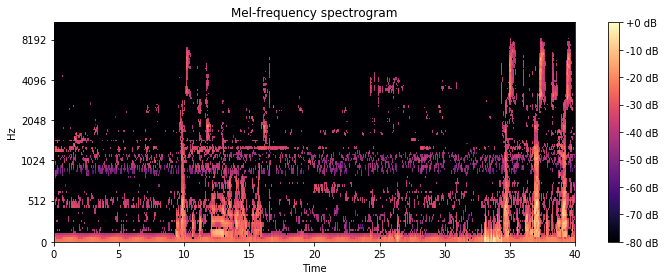

In [38]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_substracted_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_2.png')
plt.show()